Part One

In [1]:
# Reading in the file
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Elton - doing function and fitting of sin waves 
#looked at https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy for more help on this 
#a = amp, b = frequency, c is phase, offset is d
#simple formula for sin where there are 4 parts of the sin function
#def model(x, a, b, c):
def model(x, a, b, c, d):
    return a * np.sin((b * x) + c) + d

Part Two

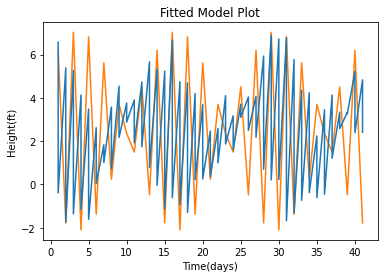

In [2]:
#Elton - parsed text file to use for data 
x_data = np.loadtxt("ASTR19_S22_group_project_data.txt",skiprows=3, usecols=(0))
y_data = np.loadtxt("ASTR19_S22_group_project_data.txt",skiprows=3, usecols=(2))

plt.errorbar(x_data, y_data)

d_mean = np.mean(y_data) 
p_zero = [4.6, 2.90, -0.7, d_mean]
popt = curve_fit(model, x_data, y_data, p0 = p_zero)
#the * removes the brackets of this array 
fit = model(x_data, *p_zero)
plt.plot(x_data, fit)
plt.title('Fitted Model Plot')
plt.xlabel("Time(days)")
plt.ylabel("Height(ft)")
plt.savefig("fit.pdf", format="pdf", bbox_inches = "tight")

Part Three

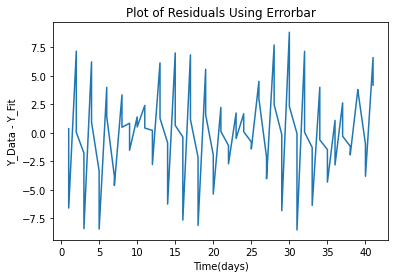

Standard deviation of the residuals: 4.044724249591175
Experimental Error: 18.340689355219848%
Intrinsic scatter: 10.840979678346486


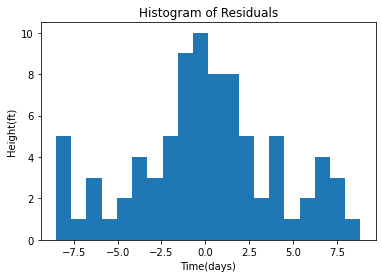

In [3]:
#Elizabeth - getting residuals using the model data and plotting them
residuals = (y_data - fit)
plt.errorbar(x_data, residuals)

#Angel-adding labels
plt.title("Plot of Residuals Using Errorbar")
plt.xlabel("Time(days)")
plt.ylabel("Y_Data - Y_Fit")
plt.savefig("residualsErrorbar.pdf", format="pdf", bbox_inches = "tight")
plt.show()

#Angel - calculated the std, error, and intrinsic scatter
resStd = residuals.std()
error = np.sqrt(np.mean(np.square(((y_data - fit) / y_data)), axis=0))
#Looked at https://link.springer.com/chapter/10.1007/978-1-4939-6572-4_11#:~:text=Intrinsic%20scatter%3A%20An%20uncertainty%20of,%3D%20%CE%B7%20i%20%2B%CE%B5%20i%20.
intrinsic = fit.var() - error.var()

print("Standard deviation of the residuals:", resStd)
print("Experimental Error:", str(error) + "%")
print("Intrinsic scatter:", intrinsic)

#Elizabeth - making residuals histogram
plt.hist(residuals, bins=20)

#Kali-adding labels
plt.title('Histogram of Residuals')
plt.xlabel("Time(days)")
plt.ylabel("Height(ft)")
plt.savefig("residualsHist.pdf", format="pdf", bbox_inches = "tight")

Part Four

Standard deviation of the Tsunami in regards to fitted data: 0.8729064698484921


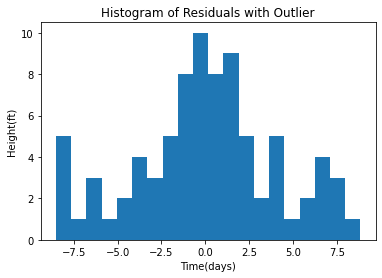

In [4]:
# Angel - reading in the data with a 2ft outlier and std of the tsunami and plotting new residuals
new_y = np.loadtxt("ASTR19_S22_group_project_data-Copy1.txt",skiprows=3, usecols=(2))
popt = curve_fit(model, x_data, new_y, p0 = p_zero)
print("Standard deviation of the Tsunami in regards to fitted data:", fit.std() - new_y.std())
new_res = (new_y - fit)

#the * removes the brackets of this array 
plt.hist(new_res, bins=20)

#Kali-adding labels
plt.title('Histogram of Residuals with Outlier')
plt.xlabel("Time(days)")
plt.ylabel("Height(ft)")
plt.savefig("residualOutlierHist.pdf", format= "pdf", bbox_inches = "tight")